# Introduction

The goal of today's class is the implementation of link prediction using a similarity-based approach. More specifically, we are going to focus our attention on the calculation and use of topological similarity indices.

The structure of the following analyses can be used as an inspiration for the project. However, some passages must be added on your own. Please refer to the next section for this week's guided list of tasks for the project.


# Project (week 7)

0) Treat your graph as undirected and unweighted, and work on the resulting largest connected component. Delete loops

1) Create a function computing CN and one of the topological indices between JI,PA,AA,RA. Your function should return a pandaframe where each row is a missing link and each column is an index. You are allowed to use built-in functions from NetworkX for computing individual indices. 

2) Create a third score by adding a column with the sum of the two indices. [NB: the arithmetic mean should be computed after rescaling each column between 0 and 1.]


3) For each of the 3 scores, identify as missing links the node pairs yielding the largest 5/10 values. Briefly comment the results.

4) Optional: Invent a new index/score and compare the result

# 0) Example graph: SNA aperitivo

In [90]:
# Import packages
import random 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import tqdm as tqdm
import itertools as it

The number of nodes in the graph is 68.


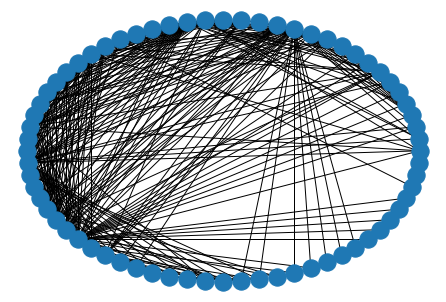

In [91]:
# Edge list for the aperitivo network
sna_ape = [('Wang', 'Akgun'), ('Wang', 'Kmoch'), ('Wang', 'Neuhaus'), ('Kmoch', 'Akgun'), ('Kmoch', 'Cuesta'), ('Kmoch', 'Mathis'), ('Kmoch', 'Meli'), ('Kmoch', 'Neuhaus'), ('Kmoch', 'Pisano'), ('Kmoch', 'Wang'), ('Neuhaus', 'Akgun'), ('Neuhaus', 'Cagnucci'), ('Neuhaus', 'Vasquez'), ('Neuhaus', 'Iavorskii'), ('Neuhaus', 'Kmoch'), ('Neuhaus', 'Kottage'), ('Neuhaus', 'Don'), ('Neuhaus', 'Meli'), ('Neuhaus', 'Pisano'), ('Neuhaus', 'Presaghi'), ('Neuhaus', 'Regragui'), ('Neuhaus', 'Wang'), ('Danish', 'Tabarani'), ('Di Nallo', 'Allam'), ('Di Nallo', 'Cervelli'), ('Di Nallo', 'Pinna'), ('Di Nallo', 'Presciutti'), ('Di Nallo', 'Salerno'), ('Allam', 'Abboud'), ('Allam', 'Akgun'), ('Allam', 'Azzi'), ('Allam', 'Baldoni'), ('Allam', 'Bruni'), ('Allam', 'Cervelli'), ('Allam', 'CocciÃ²'), ('Allam', 'Di'), ('Allam', 'Nallo'), ('Allam', 'Filosofi'), ('Allam', 'Kottage'), ('Allam', 'Don'), ('Allam', 'Pinna'), ('Allam', 'Pisano'), ('Allam', 'Salerno'), ('Allam', 'Sebastiani'), ('Allam', 'Torella'), ('Allam', 'Turco'), ('Allam', 'Wang'), ('Cervelli', 'Abboud'), ('Cervelli', 'Akgun'), ('Cervelli', 'Allam'), ('Cervelli', 'Andrijasevic'), ('Cervelli', 'Azzi'), ('Cervelli', 'Baldoni'), ('Cervelli', 'Benvenuti'), ('Cervelli', 'Brown'), ('Cervelli', 'Bruni'), ('Cervelli', 'Cagnucci'), ('Cervelli', 'Vasquez'), ('Cervelli', 'Cakmak'), ('Cervelli', 'Ceccarelli'), ('Cervelli', 'CocciÃ²'), ('Cervelli', 'Contino'), ('Cervelli', 'Cuesta'), ('Cervelli', 'Mathis'), ('Cervelli', 'Di'), ('Cervelli', 'Nallo'), ('Cervelli', 'Filosofi'), ('Cervelli', 'Kottage'), ('Cervelli', 'Don'), ('Cervelli', 'Laterza'), ('Cervelli', 'Pinna'), ('Cervelli', 'Pisano'), ('Cervelli', 'Presaghi'), ('Cervelli', 'Presciutti'), ('Cervelli', 'Regragui'), ('Cervelli', 'Salerno'), ('Cervelli', 'Sanna'), ('Cervelli', 'Sebastiani'), ('Cervelli', 'Tagliavini'), ('Cervelli', 'Torella'), ('Cervelli', 'Turco'), ('Azzi', 'Allam'), ('Azzi', 'Baldoni'), ('Azzi', 'Benvenuti'), ('Azzi', 'Brown'), ('Azzi', 'Bruni'), ('Azzi', 'Cervelli'), ('Azzi', 'CocciÃ²'), ('Azzi', 'Laterza'), ('Azzi', 'Pisano'), ('Azzi', 'Presaghi'), ('Azzi', 'Sanna'), ('Azzi', 'Sebastiani'), ('Azzi', 'Tabarani'), ('Azzi', 'Tagliavini'), ('Azzi', 'Torella'), ('Azzi', 'Turco'), ('Baldoni', 'Allam'), ('Baldoni', 'Aversa'), ('Baldoni', 'Baldoni'), ('Baldoni', 'Benvenuti'), ('Baldoni', 'Bruni'), ('Baldoni', 'Ceccarelli'), ('Baldoni', 'Cervelli'), ('Baldoni', 'CocciÃ²'), ('Baldoni', 'Contino'), ('Baldoni', 'Pinna'), ('Baldoni', 'Pisano'), ('Baldoni', 'Presaghi'), ('Baldoni', 'Regragui'), ('Baldoni', 'Salerno'), ('Baldoni', 'Sanna'), ('Baldoni', 'Sebastiani'), ('Baldoni', 'Tagliavini'), ('Baldoni', 'Torella'), ('Baldoni', 'Turco'), ('Baldoni', 'Wang'), ('Benvenuti', 'Akgun'), ('Benvenuti', 'Allam'), ('Benvenuti', 'Andrijasevic'), ('Benvenuti', 'Azzi'), ('Benvenuti', 'Baldoni'), ('Benvenuti', 'Benvenuti'), ('Benvenuti', 'Brown'), ('Benvenuti', 'Bruni'), ('Benvenuti', 'Cakmak'), ('Benvenuti', 'Ceccarelli'), ('Benvenuti', 'Cervelli'), ('Benvenuti', 'CocciÃ²'), ('Benvenuti', 'Contino'), ('Benvenuti', 'Danish'), ('Benvenuti', 'Di'), ('Benvenuti', 'Nallo'), ('Benvenuti', 'Fagnani'), ('Benvenuti', 'Farfan'), ('Benvenuti', 'Rodriguez'), ('Benvenuti', 'Filosofi'), ('Benvenuti', 'Goje'), ('Benvenuti', 'Kmoch'), ('Benvenuti', 'Kottage'), ('Benvenuti', 'Don'), ('Benvenuti', 'Laterza'), ('Benvenuti', 'Meli'), ('Benvenuti', 'Memedi'), ('Benvenuti', 'MIMUN'), ('Benvenuti', 'Pisano'), ('Benvenuti', 'Presaghi'), ('Benvenuti', 'Presciutti'), ('Benvenuti', 'Regragui'), ('Benvenuti', 'Sanna'), ('Benvenuti', 'Sebastiani'), ('Benvenuti', 'Tabarani'), ('Benvenuti', 'Tambini'), ('Benvenuti', 'Torella'), ('Benvenuti', 'Turco'), ('Benvenuti', 'Wang'), ('Benvenuti', 'Zannella'), ('Brown', 'El'), ('Brown', 'Arrag'), ('Bruni', 'Baldoni'), ('Bruni', 'Benvenuti'), ('Bruni', 'Sanna'), ('Contino', 'Azzi'), ('Contino', 'Baldoni'), ('Contino', 'Bruni'), ('Contino', 'Ceccarelli'), ('Contino', 'CocciÃ²'), ('Contino', 'Contino'), ('Contino', 'Di'), ('Contino', 'Nallo'), ('Contino', 'Filosofi'), ('Contino', 'Laterza'), ('Contino', 'Mancini'), ('Contino', 'Presaghi'), ('Contino', 'Regragui'), ('Contino', 'Sebastiani'), ('Contino', 'Tagliavini'), ('Contino', 'Turco'), ('Contino', 'Zannella'), ('Filosofi', 'Kottage'), ('Filosofi', 'Don'), ('Laterza', 'Abboud'), ('Laterza', 'Azzi'), ('Laterza', 'Baldoni'), ('Laterza', 'Benvenuti'), ('Laterza', 'Bruni'), ('Laterza', 'Ceccarelli'), ('Laterza', 'Cervelli'), ('Laterza', 'CocciÃ²'), ('Laterza', 'Contino'), ('Laterza', 'Di'), ('Laterza', 'Nallo'), ('Laterza', 'Fagnani'), ('Laterza', 'Filosofi'), ('Laterza', 'Kottage'), ('Laterza', 'Don'), ('Laterza', 'Pisano'), ('Laterza', 'Presaghi'), ('Laterza', 'Regragui'), ('Laterza', 'Sanna'), ('Laterza', 'Sebastiani'), ('Laterza', 'Tabarani'), ('Laterza', 'Tagliavini'), ('Laterza', 'Torella'), ('Laterza', 'Turco'), ('Laterza', 'Zannella'), ('Pisano', 'Tagliavini'), ('Presaghi', 'Akgun'), ('Presaghi', 'Allam'), ('Presaghi', 'Azzi'), ('Presaghi', 'Baldoni'), ('Presaghi', 'Benvenuti'), ('Presaghi', 'Brown'), ('Presaghi', 'Bruni'), ('Presaghi', 'Ceccarelli'), ('Presaghi', 'Cervelli'), ('Presaghi', 'CocciÃ²'), ('Presaghi', 'Contino'), ('Presaghi', 'Cuesta'), ('Presaghi', 'Mathis'), ('Presaghi', 'Danish'), ('Presaghi', 'Di'), ('Presaghi', 'Nallo'), ('Presaghi', 'El'), ('Presaghi', 'Arrag'), ('Presaghi', 'Fagnani'), ('Presaghi', 'Farfan'), ('Presaghi', 'Rodriguez'), ('Presaghi', 'Filosofi'), ('Presaghi', 'Formaro'), ('Presaghi', 'Iavorskii'), ('Presaghi', 'Jelusic'), ('Presaghi', 'Kmoch'), ('Presaghi', 'Kottage'), ('Presaghi', 'Don'), ('Presaghi', 'Krasnokutskii'), ('Presaghi', 'Laterza'), ('Presaghi', 'Meli'), ('Presaghi', 'Neuhaus'), ('Presaghi', 'Pisano'), ('Presaghi', 'Presaghi'), ('Presaghi', 'Regragui'), ('Presaghi', 'Sanna'), ('Presaghi', 'Sasso'), ('Presaghi', 'Tagliavini'), ('Presaghi', 'Turco'), ('Presaghi', 'Venel'), ('Sanna', 'Allam'), ('Sanna', 'Azzi'), ('Sanna', 'Baldoni'), ('Sanna', 'Benvenuti'), ('Sanna', 'Bruni'), ('Sanna', 'Ceccarelli'), ('Sanna', 'Cervelli'), ('Sanna', 'CocciÃ²'), ('Sanna', 'Fagnani'), ('Sanna', 'Filosofi'), ('Sanna', 'Laterza'), ('Sanna', 'Pisano'), ('Sanna', 'Presaghi'), ('Sanna', 'Regragui'), ('Sanna', 'Sebastiani'), ('Sanna', 'Tabarani'), ('Sanna', 'Tagliavini'), ('Sanna', 'Torella'), ('Sanna', 'Turco'), ('Sebastiani', 'Sanna'), ('Tagliavini', 'Allam'), ('Tagliavini', 'Azzi'), ('Tagliavini', 'Baldoni'), ('Tagliavini', 'Baranes'), ('Tagliavini', 'Benvenuti'), ('Tagliavini', 'Brown'), ('Tagliavini', 'Bruni'), ('Tagliavini', 'Cagnucci'), ('Tagliavini', 'Vasquez'), ('Tagliavini', 'Cakmak'), ('Tagliavini', 'Ceccarelli'), ('Tagliavini', 'Cervelli'), ('Tagliavini', 'CocciÃ²'), ('Tagliavini', 'Contino'), ('Tagliavini', 'Cuesta'), ('Tagliavini', 'Mathis'), ('Tagliavini', 'Desideri'), ('Tagliavini', 'Di'), ('Tagliavini', 'Nallo'), ('Tagliavini', 'Fagnani'), ('Tagliavini', 'Farfan'), ('Tagliavini', 'Rodriguez'), ('Tagliavini', 'Filosofi'), ('Tagliavini', 'Jelusic'), ('Tagliavini', 'Kmoch'), ('Tagliavini', 'Kochai'), ('Tagliavini', 'Laterza'), ('Tagliavini', 'Mancini'), ('Tagliavini', 'Meli'), ('Tagliavini', 'Memedi'), ('Tagliavini', 'Neuhaus'), ('Tagliavini', 'Pinna'), ('Tagliavini', 'Pisano'), ('Tagliavini', 'Pizzuto'), ('Tagliavini', 'Allende'), ('Tagliavini', 'Presaghi'), ('Tagliavini', 'Regragui'), ('Tagliavini', 'Sebastiani'), ('Tagliavini', 'Tabarani'), ('Tagliavini', 'Tambini'), ('Tagliavini', 'Torella'), ('Tagliavini', 'Turco'), ('Tagliavini', 'Wang'), ('Tagliavini', 'Zannella'), ('Torella', 'Allam'), ('Torella', 'Azzi'), ('Torella', 'Baldoni'), ('Torella', 'Benvenuti'), ('Torella', 'Bruni'), ('Torella', 'Ceccarelli'), ('Torella', 'Cervelli'), ('Torella', 'CocciÃ²'), ('Torella', 'Fagnani'), ('Torella', 'Filosofi'), ('Torella', 'Kottage'), ('Torella', 'Don'), ('Torella', 'Laterza'), ('Torella', 'Pinna'), ('Torella', 'Pisano'), ('Torella', 'Presaghi'), ('Torella', 'Regragui'), ('Torella', 'Salerno'), ('Torella', 'Sanna'), ('Torella', 'Sebastiani'), ('Torella', 'Tabarani'), ('Torella', 'Tambini'), ('Torella', 'Turco'), ('Torella', 'Wang'), ('Chisenga', 'Abboud'), ('Krasnokutskii', 'Krasnokutskii'), ('Fagnani', 'Allam'), ('Fagnani', 'Benvenuti'), ('Fagnani', 'El'), ('Fagnani', 'Arrag'), ('Fagnani', 'Farfan'), ('Fagnani', 'Rodriguez'), ('Fagnani', 'Kottage'), ('Fagnani', 'Don'), ('Fagnani', 'Laterza'), ('Fagnani', 'Regragui'), ('Fagnani', 'Tambini'), ('Fagnani', 'Torella'), ('Memedi', 'El'), ('Memedi', 'Arrag'), ('Memedi', 'Farfan'), ('Memedi', 'Rodriguez'), ('Aversa', 'Formaro'), ('Bernardini', 'Augello'), ('Bernardini', 'Desideri')]
# Build the graph from the edge list
G_SNA = nx.from_edgelist(sna_ape)

# Number of nodes
N_SNA = G_SNA.number_of_nodes()
print('The number of nodes in the graph is ' + str(N_SNA) + '.')

# Circular plot
nx.draw_circular(G_SNA)   

Let's verify whether the graph is connected or not. If it's not, we're gonna restrict ourselves to the largest connected component.

In [92]:
# Is the graph connected?
print(nx.is_connected(G_SNA))

True


In this case, we also need to remove self-loops.

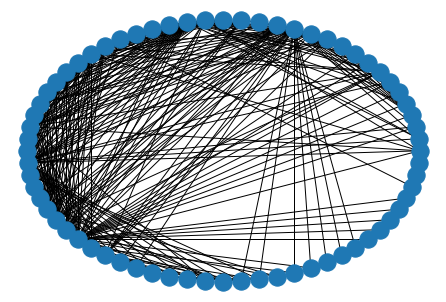

In [93]:
# Remove self-loops
G_SNA.remove_edges_from(nx.selfloop_edges(G_SNA))

# Plot the resulting graph
nx.draw_circular(G_SNA)   

# 0.5) Local topological similarity indices

NetworkX has built-in functions for all the indices we are interested in.

### Common neighbors (CN)

The CN can be implemented using the function common_neighbors(). It takes as input a graph G, and two nodes u and v to compute the index for. It returns an iterator, so we can use sorted() to print the actual values (in alphabetical order if the nodes' labels are strings, or in order of nodes' ids).

In [94]:
# Common neighbors
cn = nx.common_neighbors(G_SNA, 'Venel', 'MIMUN')  

# Print
cn_list=sorted(cn)
print(cn_list)

[]


Let's try with another couple of nodes.

In [98]:
# Common neighbors
cn = nx.common_neighbors(G_SNA, 'Wang', 'Kmoch')  

# Print
print(sorted(cn))

['Akgun', 'Benvenuti', 'Neuhaus', 'Tagliavini']


### Jaccard index (JI)

The JI can be implemented using the function jaccard_coefficient(). It takes as input a graph G, and optionally a list of node pairs (ebunch). It returns an iterator of 3-tuples in the form (u, v, p) where (u, v) is a pair of nodes and p is the index value for the pair. Also in this case, we can use sorted() to print the actual values.

In [99]:
# Jaccard index
ji = nx.jaccard_coefficient(G_SNA)  

# Print
ji_list=sorted(ji)
print(ji_list)

[('Abboud', 'Akgun', 0.2222222222222222), ('Abboud', 'Allende', 0.0), ('Abboud', 'Andrijasevic', 0.2), ('Abboud', 'Arrag', 0.0), ('Abboud', 'Aversa', 0.0), ('Abboud', 'Baranes', 0.0), ('Abboud', 'Benvenuti', 0.07317073170731707), ('Abboud', 'Bernardini', 0.0), ('Abboud', 'Bruni', 0.25), ('Abboud', 'Cakmak', 0.16666666666666666), ('Abboud', 'CocciÃ²', 0.25), ('Abboud', 'Cuesta', 0.14285714285714285), ('Abboud', 'Danish', 0.0), ('Abboud', 'Desideri', 0.0), ('Abboud', 'Di Nallo', 0.2857142857142857), ('Abboud', 'Don', 0.3), ('Abboud', 'El', 0.0), ('Abboud', 'Fagnani', 0.11764705882352941), ('Abboud', 'Farfan', 0.0), ('Abboud', 'Filosofi', 0.25), ('Abboud', 'Goje', 0.0), ('Abboud', 'Jelusic', 0.0), ('Abboud', 'Kmoch', 0.0), ('Abboud', 'Kochai', 0.0), ('Abboud', 'Mancini', 0.0), ('Abboud', 'Mathis', 0.14285714285714285), ('Abboud', 'Meli', 0.0), ('Abboud', 'Nallo', 0.375), ('Abboud', 'Neuhaus', 0.0), ('Abboud', 'Pisano', 0.23076923076923078), ('Abboud', 'Pizzuto', 0.0), ('Abboud', 'Presciut

If we actually uses the optional argument ebunch, we can single out the index values for the node pairs we specify in the list.

In [101]:
# Jaccard index for only two node pairs
ji = nx.jaccard_coefficient(G_SNA, [('Venel', 'MIMUN'), ('Wang', 'Kmoch')])  


# Print
print(sorted(ji))

[('Venel', 'MIMUN', 0.0), ('Wang', 'Kmoch', 0.2857142857142857)]


The functions implementing the next three indices work exactly as jaccard_coefficient(), so we can go a bit faster now.

### Preferential attachment index (PA)

The PA can be implemented using the function preferential_attachment().

In [102]:
# Preferential attachment index
pa = nx.preferential_attachment(G_SNA)  

# Print
pa_list=sorted(pa)
print(pa_list)

[('Abboud', 'Akgun', 28), ('Abboud', 'Allende', 4), ('Abboud', 'Andrijasevic', 8), ('Abboud', 'Arrag', 16), ('Abboud', 'Aversa', 8), ('Abboud', 'Baranes', 4), ('Abboud', 'Benvenuti', 160), ('Abboud', 'Bernardini', 8), ('Abboud', 'Bruni', 44), ('Abboud', 'Cakmak', 12), ('Abboud', 'CocciÃ²', 44), ('Abboud', 'Cuesta', 16), ('Abboud', 'Danish', 12), ('Abboud', 'Desideri', 8), ('Abboud', 'Di Nallo', 20), ('Abboud', 'Don', 36), ('Abboud', 'El', 16), ('Abboud', 'Fagnani', 60), ('Abboud', 'Farfan', 20), ('Abboud', 'Filosofi', 44), ('Abboud', 'Goje', 4), ('Abboud', 'Jelusic', 8), ('Abboud', 'Kmoch', 40), ('Abboud', 'Kochai', 4), ('Abboud', 'Mancini', 8), ('Abboud', 'Mathis', 16), ('Abboud', 'Meli', 20), ('Abboud', 'Nallo', 28), ('Abboud', 'Neuhaus', 52), ('Abboud', 'Pisano', 48), ('Abboud', 'Pizzuto', 4), ('Abboud', 'Presciutti', 12), ('Abboud', 'Rodriguez', 20), ('Abboud', 'Salerno', 20), ('Abboud', 'Sanna', 76), ('Abboud', 'Sebastiani', 40), ('Abboud', 'Tabarani', 28), ('Abboud', 'Tagliavini'

In [103]:
# Preferential attachment index for only two node pairs
pa = nx.preferential_attachment(G_SNA, [('Venel', 'MIMUN'), ('Kmoch', 'Wang')])  

# Print
print(sorted(pa))

[('Kmoch', 'Wang', 80), ('Venel', 'MIMUN', 1)]


### Adamic-Adar index (AA)

The AA can be implemented using the function adamic_adar_index().

In [104]:
# Adamic-Adar index
aa = nx.adamic_adar_index(G_SNA)  

# Print
aa_list=sorted(aa)
print(aa_list)

[('Abboud', 'Akgun', 0.5919338813425343), ('Abboud', 'Allende', 0), ('Abboud', 'Andrijasevic', 0.28126641406272834), ('Abboud', 'Arrag', 0), ('Abboud', 'Aversa', 0), ('Abboud', 'Baranes', 0), ('Abboud', 'Benvenuti', 0.9026013486223403), ('Abboud', 'Bernardini', 0), ('Abboud', 'Bruni', 0.9026013486223403), ('Abboud', 'Cakmak', 0.28126641406272834), ('Abboud', 'CocciÃ²', 0.9026013486223403), ('Abboud', 'Cuesta', 0.28126641406272834), ('Abboud', 'Danish', 0), ('Abboud', 'Desideri', 0), ('Abboud', 'Di Nallo', 0.5919338813425343), ('Abboud', 'Don', 0.9026013486223403), ('Abboud', 'El', 0), ('Abboud', 'Fagnani', 0.6213349345596119), ('Abboud', 'Farfan', 0), ('Abboud', 'Filosofi', 0.9026013486223403), ('Abboud', 'Goje', 0), ('Abboud', 'Jelusic', 0), ('Abboud', 'Kmoch', 0), ('Abboud', 'Kochai', 0), ('Abboud', 'Mancini', 0), ('Abboud', 'Mathis', 0.28126641406272834), ('Abboud', 'Meli', 0), ('Abboud', 'Nallo', 0.9026013486223403), ('Abboud', 'Neuhaus', 0), ('Abboud', 'Pisano', 0.9026013486223403

In [105]:
# Adamic-Adar index for only two node pairs
aa = nx.adamic_adar_index(G_SNA, [('Venel', 'MIMUN'), ('Wang', 'Kmoch')])  

# Print
print(sorted(aa))

[('Venel', 'MIMUN', 0), ('Wang', 'Kmoch', 1.4375519293167105)]


### Resource allocation index (RA)

The RA can be implemented using the function resource_allocation_index().

In [106]:
# Resource allocation index
ra = nx.resource_allocation_index(G_SNA)  

# Print
print(sorted(ra))

[('Abboud', 'Akgun', 0.06857142857142857), ('Abboud', 'Allende', 0), ('Abboud', 'Andrijasevic', 0.02857142857142857), ('Abboud', 'Arrag', 0), ('Abboud', 'Aversa', 0), ('Abboud', 'Baranes', 0), ('Abboud', 'Benvenuti', 0.10857142857142857), ('Abboud', 'Bernardini', 0), ('Abboud', 'Bruni', 0.10857142857142857), ('Abboud', 'Cakmak', 0.02857142857142857), ('Abboud', 'CocciÃ²', 0.10857142857142857), ('Abboud', 'Cuesta', 0.02857142857142857), ('Abboud', 'Danish', 0), ('Abboud', 'Desideri', 0), ('Abboud', 'Di Nallo', 0.06857142857142857), ('Abboud', 'Don', 0.10857142857142857), ('Abboud', 'El', 0), ('Abboud', 'Fagnani', 0.08), ('Abboud', 'Farfan', 0), ('Abboud', 'Filosofi', 0.10857142857142857), ('Abboud', 'Goje', 0), ('Abboud', 'Jelusic', 0), ('Abboud', 'Kmoch', 0), ('Abboud', 'Kochai', 0), ('Abboud', 'Mancini', 0), ('Abboud', 'Mathis', 0.02857142857142857), ('Abboud', 'Meli', 0), ('Abboud', 'Nallo', 0.10857142857142857), ('Abboud', 'Neuhaus', 0), ('Abboud', 'Pisano', 0.10857142857142857), ('

In [108]:
# Resource allocation index for only two node pairs
ra = nx.resource_allocation_index(G_SNA, [('Venel', 'MIMUN'), ('Wang', 'Kmoch')])  

# Print
print(sorted(ra))


[('Venel', 'MIMUN', 0), ('Wang', 'Kmoch', 0.267002442002442)]


# 1)  All-in-one function

The function you are asked to build should take as input a graph G, just like the other functions we have seen so far. 

You need to return a DataFrame with two columns: First index, Second index and such that the name of the rows are missing pairs and the name of the columns the index that you chose.

Be careful that only missing links should be present.

What does it shoud look like:

In [84]:
sim_df

,CN,RA
"(Wang, Cuesta)",2,0.122222
"(Wang, Mathis)",2,0.122222
"(Wang, Meli)",4,0.224145
"(Wang, Pisano)",7,0.351764
"(Wang, Cagnucci)",2,0.099145
...,...,...
"(Augello, Desideri)",1,0.500000
"(Augello, Kochai)",0,0.000000
"(Augello, Pizzuto)",0,0.000000
"(Augello, Allende)",0,0.000000


![sim_example](sim_df2.png)

In [22]:
# Example of how to create a dateframe (in case it is needed)

# initialize list of lists 
data = [['tom', 10], ['nick', 15], ['juli', 14]]   
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns=['Name', 'Age']) 
# print dataframe. 
df 
# rename also the line. Check the documentation on dataframe

,Name,Age
0,tom,10
1,nick,15
2,juli,14


# 2) Three likelihood scores

The first two likelihood scores coincide with the two topological indices. To build the arithmetic mean, we need to scale each index separately between 0 and 1, and then average the indices. To scale each index, we can build a function min_max_scale() and apply it to each column of the DataFrame using transform().

Now, we need to compute the link likelihood scores. We need some post processing:
- Normalization
- Averaging

The pandaframe framework allows us to do this two operation easily

In [109]:
# Function to rescale an array between 0 and 1
def min_max_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Apply the function to the columns of the DataFrame
scaled_sim_df = sim_df.transform(min_max_scale, axis = 0)
print(scaled_sim_df)

                       CN        RA
(Wang, Cuesta)       0.10  0.073124
(Wang, Mathis)       0.10  0.073124
(Wang, Meli)         0.20  0.134103
(Wang, Pisano)       0.35  0.210456
(Wang, Cagnucci)     0.10  0.059317
...                   ...       ...
(Augello, Desideri)  0.05  0.299143
(Augello, Kochai)    0.00  0.000000
(Augello, Pizzuto)   0.00  0.000000
(Augello, Allende)   0.00  0.000000
(Augello, Chisenga)  0.00  0.000000

[3954 rows x 2 columns]


Now, we need to compute the average over the indices for each node pair. To get the third link likelihood score, we can use the function np.mean() inside aggregate(), proceeding in this case by row. This applies the function np.mean() to each row, returning a single value per row (the mean of the five indices).

In [111]:
# Compute the mean over the columns
mean_score = scaled_sim_df.aggregate(np.mean, axis = 1)

We can concatenate the similarity indices DataFrame and the one containing the mean score to obtain a DataFrame with all the link likelihood scores we need. We can also replace the columns' names.

In [112]:
# Link likelihood scores DataFrame
score_df = pd.concat([sim_df, mean_score], axis = 1)

# Change the columns' names
score_df.columns = ('CN_score', 'RA_score','Mean_score')

# Print
print(score_df)

                     CN_score  RA_score  Mean_score
(Wang, Cuesta)              2  0.122222    0.086562
(Wang, Mathis)              2  0.122222    0.086562
(Wang, Meli)                4  0.224145    0.167052
(Wang, Pisano)              7  0.351764    0.280228
(Wang, Cagnucci)            2  0.099145    0.079659
...                       ...       ...         ...
(Augello, Desideri)         1  0.500000    0.174572
(Augello, Kochai)           0  0.000000    0.000000
(Augello, Pizzuto)          0  0.000000    0.000000
(Augello, Allende)          0  0.000000    0.000000
(Augello, Chisenga)         0  0.000000    0.000000

[3954 rows x 3 columns]


# 3) Prediction

As a final step in our similarity-based approach, we need to rank each score, and to pick (in this case) the top 5 values.

Each score can be ranked separately using rank() on columns. To assign rank 1 to the maximum, we need to set ascending = 'False'. [The other argument - method = 'first' - says that, in case of ties between two or more scores, ranks are assigned in order they appear in the original data. It is really of secondary importance here, so you can simply leave it as this.]

In [113]:
ranked_df = score_df.rank(axis = 0, method = 'first', ascending = False)

Finally, we need to select - for each column in the ranked DataFrame - all the row names (i.e., node pairs) that have a rank between 1 and 10. Let's see an example using the CN score.

In [119]:
# Predicted links using the CN-based link likelihood score
CN_pred = ranked_df[ranked_df['CN_score'] <= 10].index.to_list()
print(CN_pred)

[('Allam', 'Contino'), ('Allam', 'Laterza'), ('Bruni', 'CocciÃ²'), ('Bruni', 'Turco'), ('Torella', 'Contino'), ('Contino', 'Allam'), ('Contino', 'Torella'), ('Contino', 'Sanna'), ('Laterza', 'Allam'), ('Sanna', 'Contino')]


Doing the same for the other scores returns the sets of 10 links that are predicted in each case.

Finally, you should compare the results you get, and briefly comment on them (e.g., you get the same results or not, possible explanations, etc.).

In [120]:
RA_pred = ranked_df[ranked_df['RA_score'] <= 10].index.to_list()
print(RA_pred)

[('Neuhaus', 'Cervelli'), ('Neuhaus', 'Benvenuti'), ('Presaghi', 'Memedi'), ('Allam', 'Contino'), ('Allam', 'Laterza'), ('Cervelli', 'Neuhaus'), ('Benvenuti', 'Neuhaus'), ('Contino', 'Allam'), ('Laterza', 'Allam'), ('Fagnani', 'Memedi')]


We notice that Allam,Contino and Allam Laterza appeared under both ranking so it reinforce the idea that it is one of the main missing links. We notice that otherwise the other pair do not appear in both ranking.

Moreover, each of these link appeared twice: we should change the preogram for each link to appear only once.